###### import pandas as pd
import numpy as np

num_topics = 24
data_path = "~/Desktop/DataViz/whisper/whisperVis/data/topicModeling/con"
df = pd.read_csv(data_path + f"/{num_topics}/beta.csv")

display(df.head())
print(df.shape)

## Computing topic word distribution

In [33]:
topic_word_distr = []
imp_words = []
terms = df[df.topic == 1].term.values.tolist()

num_topics = len(df.topic.unique())
for i in range(1, num_topics+1):
    topic = df[df.topic == i] 
    vals = topic.beta.values.tolist()
    topic_word_distr += [np.asarray(vals)]
    words = [terms[i] for i in np.asarray(vals).argsort()[-10:][::-1].tolist()]
    imp_words.append(words)
    
print(len(topic_word_distr))
print(len(imp_words))

24
24


# Dissimilarity Measure

In [34]:
from scipy.spatial import distance

dist = []
for i in range(num_topics): 
    t1 = topic_word_distr[i]
    d1 = []
    for j in range(num_topics):
        t2 = topic_word_distr[j]
        d = distance.jensenshannon(t1, t2)
        d1.append(d)
    dist.append(d1)

print(dist)

[[0.0, 0.8318505311239278, 0.8312021533915369, 0.8320485583343156, 0.8321128900254099, 0.8324293416480609, 0.8322647968521858, 0.8315499913285773, 0.8314502576574654, 0.8313410162830989, 0.8318673826591025, 0.8322670761680295, 0.8323356471332289, 0.8320855578739523, 0.832107596712574, 0.8321045456000236, 0.8325544343930518, 0.831211928678588, 0.8315322833577191, 0.8325543603455217, 0.8325100851302332, 0.8320754815400431, 0.8321912193592951, 0.8325546046019562], [0.8318505311239278, 0.0, 0.8319934793477604, 0.8324414189485437, 0.8325519648911994, 0.8322366373493445, 0.8323481823597412, 0.8322503781423616, 0.8317051047518907, 0.8315438319356244, 0.8318749906112564, 0.8306857620340468, 0.832554597529757, 0.8322224858117766, 0.829300239412496, 0.8325509932443316, 0.8325545947442692, 0.8312956933641839, 0.8325360644422971, 0.8324486442264223, 0.832379951496198, 0.8318429146085543, 0.8321674517883927, 0.8325532819260727], [0.8312021533915369, 0.8319934793477604, 0.0, 0.8324279385002008, 0.83

# Dimensionality Reduction

## TSNE

In [35]:
# Clustering
from sklearn.manifold import TSNE
# tsne = TSNE(n_components=2)
tsne = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
X_tsne = tsne.fit_transform(topic_word_distr)

[t-SNE] Computing 23 nearest neighbors...
[t-SNE] Indexed 24 samples in 0.000s...
[t-SNE] Computed neighbors for 24 samples in 0.117s...
[t-SNE] Computed conditional probabilities for sample 24 / 24
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.469181
[t-SNE] KL divergence after 1000 iterations: 0.398044


## PCA

In [36]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_tsne = pca.fit_transform(topic_word_distr)

In [37]:
print(X_tsne)

[[-0.01622605 -0.01049528]
 [-0.01604029 -0.01031833]
 [-0.01580061 -0.0100419 ]
 [-0.01719617 -0.01158023]
 [-0.04162576  0.37008723]
 [-0.02690406 -0.03154019]
 [-0.02566454 -0.02768826]
 [-0.01713373 -0.01153001]
 [-0.01961396 -0.01487922]
 [-0.01548574 -0.00971705]
 [-0.01609956 -0.01036037]
 [-0.01964971 -0.01490861]
 [-0.01871176 -0.01206551]
 [-0.02103097 -0.0170131 ]
 [-0.03302337 -0.07407712]
 [-0.01861852 -0.01982292]
 [-0.01994841 -0.01532807]
 [-0.01675665 -0.01112712]
 [-0.01624495 -0.01053543]
 [-0.01743872 -0.01206387]
 [-0.02480152 -0.02521869]
 [ 0.46900491  0.01434281]
 [-0.01593736 -0.01018502]
 [-0.0190525  -0.01393373]]


# Visualization

In [38]:
# Generate random colors

import random
get_colors = lambda n: list(map(lambda i: "#" + "%06x" % random.randint(0, 0xFFFFFF),range(n)))
colormap = np.asarray(get_colors(num_topics)) 
print(colormap)

['#fdb2f1' '#5fc3e0' '#35fefe' '#4792e9' '#5ccdfd' '#74d8d4' '#d0a10c'
 '#6f2ba4' '#e5261f' '#e0f56a' '#9fb894' '#f4ca8b' '#d40b12' '#241503'
 '#41e2e2' '#a75113' '#c06af7' '#801d15' '#c82e52' '#38161f' '#6972c7'
 '#79e2a9' '#2ddf74' '#bf0e73']


In [39]:
df_cluster = pd.DataFrame()
df_cluster['X'] = X_tsne[:, 0]
df_cluster['Y'] = X_tsne[:, 1]
df_cluster['Topic'] = range(num_topics)
df_cluster['Topic_Words'] = imp_words

cluster_colors = dict()
for c in range(num_topics): 
    cluster_colors[c] = colormap[c]
    
df_cluster['Colors'] = df_cluster['Topic'].apply(lambda l: cluster_colors[l])
df_cluster.sort_values(by=['Topic'], inplace=True)

df_cluster['Topic'] = df_cluster['Topic']+1
display(df_cluster.head())

,X,Y,Topic,Topic_Words,Colors
0,-0.016226,-0.010495,1,"[cultur, salari, start, structur, competit, in...",#fdb2f1
1,-0.016040,-0.010318,2,"[leadership, skill, travel, intern, develop, s...",#5fc3e0
2,-0.015801,-0.010042,3,"[difficult, system, forc, hot, cold, live, tec...",#35fefe
3,-0.017196,-0.011580,4,"[worker, extrem, heavi, workload, qualiti, lif...",#4792e9
4,-0.041626,0.370087,5,"[hour, day, shift, sometim, call, home, cut, c...",#5ccdfd


In [40]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# import os
# sns.scatterplot(x = "X", y="Y", hue="Topic", data=df_cluster)
# plt.xlabel("PCA1")
# plt.ylabel("PCA2")
# plt.title("PCA Visualization of topics")
# plt.savefig(os.path.expanduser("~/Desktop/img/PCApro.png"))
# plt.show()

In [41]:
from bokeh.plotting import figure, show, output_notebook, save#, output_file
from bokeh.models import HoverTool, value, LabelSet, Legend, ColumnDataSource
from bokeh.io import export_png
output_notebook()

Loading BokehJS ...

In [42]:
source = ColumnDataSource(dict(
    x=df_cluster['X'],
    y=df_cluster['Y'],
    color=df_cluster['Colors'],
    label=df_cluster['Topic'],
    topic_words = df_cluster["Topic_Words"]
))

In [43]:
title = 'PCA visualization of topics (pro)'

plot_lda = figure(plot_width=1000, plot_height=700,
                     title=title, tools="pan,wheel_zoom,box_zoom,reset,hover,previewsave",
                     x_axis_type=None, y_axis_type=None, min_border=1, 
                     x_axis_label = "PCA1", y_axis_label = "PCA2")

plot_lda.scatter(x='x', y='y',  legend='label', source=source,
                 color='color', alpha=0.8)#'msize', )

# hover tools
hover = plot_lda.select(dict(type=HoverTool))
hover.tooltips = { "Topic": "@label  <br> Topic_words: @topic_words "}
plot_lda.legend.location = "top_left"

# export_png(plot_lda, filename=os.path.expanduser("~/Desktop/img/PCAcon.png"))
show(plot_lda)

# Saving File

In [44]:
display(df_cluster.head())
display(df_cluster.shape)

,X,Y,Topic,Topic_Words,Colors
0,-0.016226,-0.010495,1,"[cultur, salari, start, structur, competit, in...",#fdb2f1
1,-0.016040,-0.010318,2,"[leadership, skill, travel, intern, develop, s...",#5fc3e0
2,-0.015801,-0.010042,3,"[difficult, system, forc, hot, cold, live, tec...",#35fefe
3,-0.017196,-0.011580,4,"[worker, extrem, heavi, workload, qualiti, lif...",#4792e9
4,-0.041626,0.370087,5,"[hour, day, shift, sometim, call, home, cut, c...",#5ccdfd


(24, 5)

In [49]:
import os
df_cluster.to_csv(os.path.expanduser(data_path + f"/{num_topics}/topic_center.csv"))

# Topic Proportion

In [50]:
df = pd.read_csv(data_path + f"/{num_topics}/gamma.csv")

display(df.head())
print(df.shape)

,document,topic,gamma
0,1,1,0.014057
1,2,1,0.017850
2,3,1,0.028949
3,4,1,0.013493
4,5,1,0.007612


(791520, 3)


In [51]:
lst = []
for t in range(1, num_topics+1): 
    df_topic = df[df.topic == t]
    lst.append(df_topic.gamma.sum())

tot = sum(lst)
lst = np.array([round(i/tot, 4) for i in lst])

df_cluster["Topic_Proportion"] = lst
display(df_cluster.head())

,X,Y,Topic,Topic_Words,Colors,Topic_Proportion
0,-0.016226,-0.010495,1,"[cultur, salari, start, structur, competit, in...",#fdb2f1,0.0303
1,-0.016040,-0.010318,2,"[leadership, skill, travel, intern, develop, s...",#5fc3e0,0.0208
2,-0.015801,-0.010042,3,"[difficult, system, forc, hot, cold, live, tec...",#35fefe,0.0301
3,-0.017196,-0.011580,4,"[worker, extrem, heavi, workload, qualiti, lif...",#4792e9,0.0189
4,-0.041626,0.370087,5,"[hour, day, shift, sometim, call, home, cut, c...",#5ccdfd,0.0632


In [52]:
df_cluster.to_csv(data_path + f"/{num_topics}/topic_center.csv")

# Topic Term Distribution

In [53]:
df = pd.read_csv(data_path + f"/{num_topics}/beta.csv")
display(df.head())
tot_term = df[df.topic == 1]['term'].count()
print(tot_term)

,topic,term,beta
0,1,’_care,8.624717e-100
1,2,’_care,2.555270e-93
2,3,’_care,1.219269e-114
3,4,’_care,3.194975e-91
4,5,’_care,7.375773e-119


6420


In [54]:
terms = df[df.topic == 1]["term"].values.tolist()
lst = []
i = 1
for t in terms: 
    term_prob = df[df.term == t]['beta'].sum()/num_topics
    lst.append([i, t, term_prob])
    i = i+1
df_term = pd.DataFrame(lst, columns=['Term_Id', 'Term', 'Term_Prob'])
display(df_term.head())
display(df_term.shape)

,Term_Id,Term,Term_Prob
0,1,’_care,0.000009
1,2,’_re,0.000042
2,3,1_hour_lunch,0.000018
3,4,1_minut_late,0.000004
4,5,1_short_break,0.000007


(6420, 3)

In [55]:
for t in terms: 
    term_prob = df_term.loc[df_term.Term == t, "Term_Prob"].iloc[0]
    df.loc[df.term == t, "Term_Prob"] = term_prob
    
df["Term_Freq"] = df.Term_Prob * tot_term

In [56]:
display(df.head())

,topic,term,beta,Term_Prob,Term_Freq
0,1,’_care,8.624717e-100,0.000009,0.056805
1,2,’_care,2.555270e-93,0.000009,0.056805
2,3,’_care,1.219269e-114,0.000009,0.056805
3,4,’_care,3.194975e-91,0.000009,0.056805
4,5,’_care,7.375773e-119,0.000009,0.056805


In [57]:
df.rename(columns={"topic": "Topic", "term": "Term", "beta": "Beta"}, inplace=True)
display(df.head())

,Topic,Term,Beta,Term_Prob,Term_Freq
0,1,’_care,8.624717e-100,0.000009,0.056805
1,2,’_care,2.555270e-93,0.000009,0.056805
2,3,’_care,1.219269e-114,0.000009,0.056805
3,4,’_care,3.194975e-91,0.000009,0.056805
4,5,’_care,7.375773e-119,0.000009,0.056805


# Save File

In [58]:
df.to_csv(data_path + f"/{num_topics}/topic_term_distr.csv")

# How to calculate relevance?

In [23]:
df_relevance = df.copy()

In [24]:
lam = .5
df_relevance["Relevance"] = lam*df_relevance.Beta + (1-lam)*df_relevance.Beta/df_relevance.Term_Prob
display(df_relevance.head())

,Topic,Term,Beta,Term_Prob,Term_Freq,Relevance
0,1,1_hour_break,3.672673e-208,0.000008,0.054787,2.225913e-203
1,2,1_hour_break,1.351000e-189,0.000008,0.054787,8.188065e-185
2,3,1_hour_break,8.675901e-213,0.000008,0.054787,5.258241e-208
3,4,1_hour_break,4.690151e-197,0.000008,0.054787,2.842581e-192
4,5,1_hour_break,6.897081e-192,0.000008,0.054787,4.180144e-187


In [25]:
df5 = df_relevance[df_relevance.Topic == 1]
relevant_term = df5.sort_values(by="Relevance", ascending=False)[:10]

In [26]:
relevant_term.sort_values(by="Term_Freq", ascending=False, inplace=True)

In [27]:
relevant_term["Term_Freq"] = np.round(relevant_term["Term_Freq"])

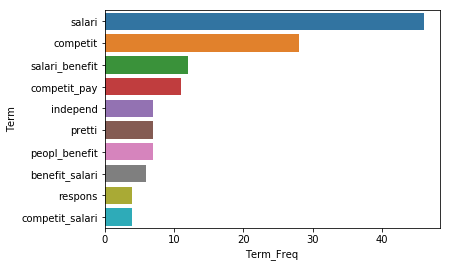

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x="Term_Freq", y="Term", data=relevant_term)
plt.show()

# Pro Con Similarity

In [59]:
import pandas as pd
import numpy as np

# num_topics_pro = 8
num_topics_pro = 26

df_pro = pd.read_csv(f"~/Desktop/R_js/data/beta/pro{num_topics_pro}_beta.csv")

# num_topics_con = 10
num_topics_con = 24

df_con = pd.read_csv(f"~/Desktop/R_js/data/beta/con{num_topics_con}_beta.csv")

display(df_pro.head())
display(df_pro.shape)

display(df_con.head())
display(df_con.shape)

,topic,term,beta
0,1,1_hour_break,3.672673e-208
1,2,1_hour_break,1.351000e-189
2,3,1_hour_break,8.675901e-213
3,4,1_hour_break,4.690151e-197
4,5,1_hour_break,6.897081e-192


(172666, 3)

,topic,term,beta
0,1,’_care,8.624717e-100
1,2,’_care,2.555270e-93
2,3,’_care,1.219269e-114
3,4,’_care,3.194975e-91
4,5,’_care,7.375773e-119


(154080, 3)

In [60]:
pro_terms = df_pro[df_pro.topic == 1]["term"].values.tolist()
con_terms = df_con[df_con.topic == 1]["term"].values.tolist()

pro_con = list(set(pro_terms) & set(con_terms))
print(len(pro_con))
print(pro_con)

2096
['peopl', 'whenev', 'manag_pay_benefit', 'inform', 'sweat', 'commun', 'sort', 'specialist', 'probabl', 'opportun_advanc', 'tie', 'research', 'life_balanc', 'off', 'lax', 'stretch', '1_hour_lunch', 'hear', 'grate', 'ect', 'special', 'hour_lunch_break', 'benefit_pay', 'worklif_balanc_manag', 'thru', 'solv', 'command', 'coordin', 'respons', 'friend', 'hold', 'dental', 'pocket', 'center', '15_minut_break', 'acquir', 'main', 'deliveri', '30_min_break', 'crowd', 'workweek', 'mechan', 'nation', 'benefit_retir', 'inclement', 'commut', 'obtain', 'sick', 'accur', 'pay_health_benefit', 'cost_studi', 'time_home', 'appropri', 'race', 'day_weekend', 'famili_friendli', 'anytim', 'feedback', 'hit', 'solut', 'believ', 'insur_benefit', 'zero', 'primarili', 'garag', 'mentor', 'independ', 'citigroup', 'bar', 'liter', 'pay_posit', 'staff', 'enrol', 'break_4_hour', 'aggress', 'vacat', 'hour_overtim', 'machineri', 'manag_worklif_balanc', 'guarante', 'cloud', 'round', 'help_custom', 'stock_option', 'eat'

In [61]:
just_pro = list(set(pro_terms) - set(con_terms))
just_con = list(set(con_terms) - set(pro_terms))


print(len(just_pro) + len(just_con) + 2*len(pro_con))
print(len(pro_terms) + len(con_terms))

13061
13061


In [62]:

n = len(just_con)
for i in range(1, num_topics_pro+1):
    topic = np.full(n, i)
    beta = np.full(n, 0)
    df_temp = pd.DataFrame()
    df_temp["topic"] = topic
    df_temp["term"] = just_con
    df_temp["beta"] = beta
    df_pro = pd.concat([df_pro, df_temp], ignore_index=True, sort=False)
    
n = len(just_pro)
for i in range(1, num_topics_con+1):
    topic = np.full(n, i)
    beta = np.full(n, 0)
    df_temp = pd.DataFrame()
    df_temp["topic"] = topic
    df_temp["term"] = just_pro
    df_temp["beta"] = beta
    df_con = pd.concat([df_con, df_temp], ignore_index=True, sort=False)
    
    
df_pro["procon"] = "pro"
df_pro["color"] = "#c67f1f"
df_con["procon"] = "con"
df_con["color"] = "#20e560"

display(df_pro.head())
display(df_con.head())

,topic,term,beta,procon,color
0,1,1_hour_break,3.672673e-208,pro,#c67f1f
1,2,1_hour_break,1.351000e-189,pro,#c67f1f
2,3,1_hour_break,8.675901e-213,pro,#c67f1f
3,4,1_hour_break,4.690151e-197,pro,#c67f1f
4,5,1_hour_break,6.897081e-192,pro,#c67f1f


,topic,term,beta,procon,color
0,1,’_care,8.624717e-100,con,#20e560
1,2,’_care,2.555270e-93,con,#20e560
2,3,’_care,1.219269e-114,con,#20e560
3,4,’_care,3.194975e-91,con,#20e560
4,5,’_care,7.375773e-119,con,#20e560


In [63]:
df = pd.concat([df_pro, df_con], ignore_index=True, sort=False)
